# Get network communities

This notebook gets network communities for the compendia (PAO1 and PA14) using different thresholds.

The output of this notebook are files for each threshold. These files have the following columns:
gene id | module id

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from core_acc_modules import paths
from rpy2.robjects import pandas2ri

pandas2ri.activate()

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Set user parameters

For now we will vary the correlation threshold (`corr_threshold`) but keep the other parameters consistent

We will run this notebook for each threshold parameter

In [2]:
# Params
corr_threshold = 0.5

# Params for hclust
# clustering_method is the distance metric used to determine if clusters should be merged
# https://en.wikipedia.org/wiki/Hierarchical_clustering
clustering_method = "average"

# Params for cutreeDynamic
# minimum cluster size
min_cluster_size = 30

# The higher the value (or if TRUE), the more and smaller clusters will be produced
deep_split = 2


# Output files
pao1_membership_filename = f"pao1_membership_{corr_threshold}.tsv"
pa14_membership_filename = f"pa14_membership_{corr_threshold}.tsv"

In [3]:
# Load expression data
pao1_compendium_filename = paths.PAO1_COMPENDIUM
pa14_compendium_filename = paths.PA14_COMPENDIUM

In [4]:
pao1_compendium = pd.read_csv(pao1_compendium_filename, sep="\t", header=0, index_col=0)
pa14_compendium = pd.read_csv(pa14_compendium_filename, sep="\t", header=0, index_col=0)

In [5]:
print(pao1_compendium.shape)
pao1_compendium.head()

(847, 5563)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
ERX541579,150.908951,63.968306,56.863002,86.013480,32.240954,48.322611,21.099413,21.219456,31.521424,12.168960,...,0.000000,16.606783,38.218939,8.611779,28.396413,110.943698,137.583940,101.058282,65.210599,0.000000
ERX541580,108.323515,56.079007,57.001674,73.421480,18.426169,46.572630,16.606703,18.595344,30.253393,15.936006,...,0.000000,13.904292,37.246074,11.777708,45.733000,94.799523,53.486191,82.753701,23.340646,38.113576
ERX541591,556.704228,182.309588,81.730476,157.348561,85.185006,116.643999,36.964524,31.973493,63.109930,16.140763,...,14.312595,73.032021,80.369628,49.312460,69.099677,61.622295,103.911157,186.030844,478.965167,0.000000
ERX541592,428.470250,178.510235,74.953217,152.142022,92.393069,95.317522,33.668009,31.262234,81.131515,20.126563,...,6.691671,114.618032,62.583672,56.426453,58.473904,55.311934,101.620394,207.409539,345.057960,0.000000
ERX676205,555.932721,530.701952,295.028891,336.887163,160.855884,196.799841,24.062303,127.448405,251.543954,29.933785,...,9.935461,59.660341,268.159400,40.929204,30.272774,284.146647,357.806954,260.651493,110.621722,0.000000


In [6]:
print(pa14_compendium.shape)
pa14_compendium.head()

(520, 5891)


,PA14_55610,PA14_55600,PA14_55590,PA14_55580,PA14_55570,PA14_55560,PA14_55550,PA14_55540,PA14_55530,PA14_55520,...,PA14_19205,PA14_17675,PA14_67975,PA14_36345,PA14_43405,PA14_38825,PA14_24245,PA14_28895,PA14_55117,PA14_59845
ERX1477379,11.030217,1.370300,0.683438,63.527772,34.586977,4.709054,5.274344,8.137393,5.310585,0.766974,...,10.688588,82.981151,63.650349,28.877599,7.956130,56.829502,269.183334,6.074311,29.079407,100.748813
ERX1477380,13.419626,3.039174,1.334504,105.003820,70.493150,8.849012,6.802855,18.784232,11.978251,2.088495,...,15.823345,91.090917,62.400165,24.819442,3.132517,31.325168,181.774134,10.866863,16.090103,233.317754
ERX1477381,13.155391,5.684725,7.208220,143.201487,107.849795,12.753058,8.868100,27.482294,13.951196,1.251785,...,28.406181,98.909427,71.429549,24.114657,6.515803,18.616579,184.357151,13.112427,13.970424,93.182566
ERX2174773,4.201447,4.194614,3.283683,3.273384,20.188057,3.804287,2.665245,2.650568,20.062716,3.755125,...,41.954387,35.821193,114.727681,104.737209,0.000000,391.722223,160.215744,18.980486,20.985404,182.605858
ERX2174774,5.016892,3.306859,3.446703,2.676762,17.199329,3.748607,1.618736,4.083091,21.225030,2.373772,...,44.138587,26.599121,105.848301,104.402335,0.000000,444.485136,168.538985,24.906987,19.775702,206.865218


## Make adjacency matrix

In [7]:
# Get perason correlation
# This correlation matrix will represent the concordance
# between two gene expression profiles
pao1_corr = pao1_compendium.corr()
pa14_corr = pa14_compendium.corr()

In [8]:
pao1_corr.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
PA0001,1.000000,0.463956,0.569484,0.351438,0.245083,0.082922,-0.237419,0.327681,0.611781,-0.053683,...,-0.143054,0.067547,-0.046884,0.115943,0.095939,0.137961,0.123254,0.413492,-0.017787,-0.044556
PA0002,0.463956,1.000000,0.252376,0.748150,0.165336,-0.064989,-0.223772,0.474954,0.404363,-0.091208,...,-0.049508,-0.029025,0.068886,0.066085,-0.081798,0.364207,0.230212,0.295833,-0.003284,0.026462
PA0003,0.569484,0.252376,1.000000,0.370005,0.231063,0.305920,-0.227813,0.226757,0.414430,0.044911,...,-0.161805,-0.105521,0.058363,-0.032366,0.118532,0.204444,0.136097,0.330368,-0.000470,-0.053666
PA0004,0.351438,0.748150,0.370005,1.000000,0.178458,-0.013829,-0.289639,0.519269,0.406310,-0.039080,...,-0.141347,-0.146768,0.188109,-0.079627,0.004548,0.385017,0.265849,0.248906,-0.068307,-0.074792
PA0005,0.245083,0.165336,0.231063,0.178458,1.000000,0.494013,0.054159,0.548067,0.458342,0.600835,...,0.028263,0.156724,0.147440,0.288880,0.274439,0.158833,-0.076657,0.376051,0.323167,0.055236


In [9]:
# Create adjacency matrix using threshold defined above
# The adjacency matrix will determine the strength of the connection between two genes
# If the concordance is strong enough (i.e. above the threshold), then
# the genes are connected by an edge
pao1_adj = (pao1_corr.abs() >= corr_threshold).astype(float)
pa14_adj = (pa14_corr.abs() >= corr_threshold).astype(float)

In [10]:
pao1_adj.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
PA0001,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA0002,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA0003,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA0004,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA0005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Plot

Plot clustering of adjacency matrix

<Figure size 1440x1440 with 0 Axes>

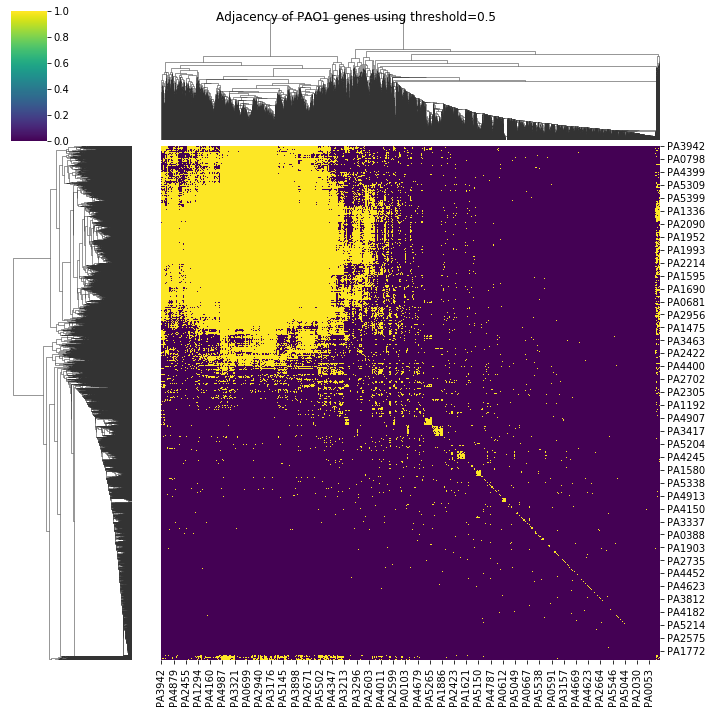

In [11]:
# Plot heatmap
plt.figure(figsize=(20, 20))
h1 = sns.clustermap(pao1_adj, cmap="viridis")
h1.fig.suptitle(f"Adjacency of PAO1 genes using threshold={corr_threshold}")

# Save
pao1_clustermap_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pao1_adj_{corr_threshold}_clustermap.png"
)
h1.savefig(pao1_clustermap_filename, dpi=300)

<Figure size 1440x1440 with 0 Axes>

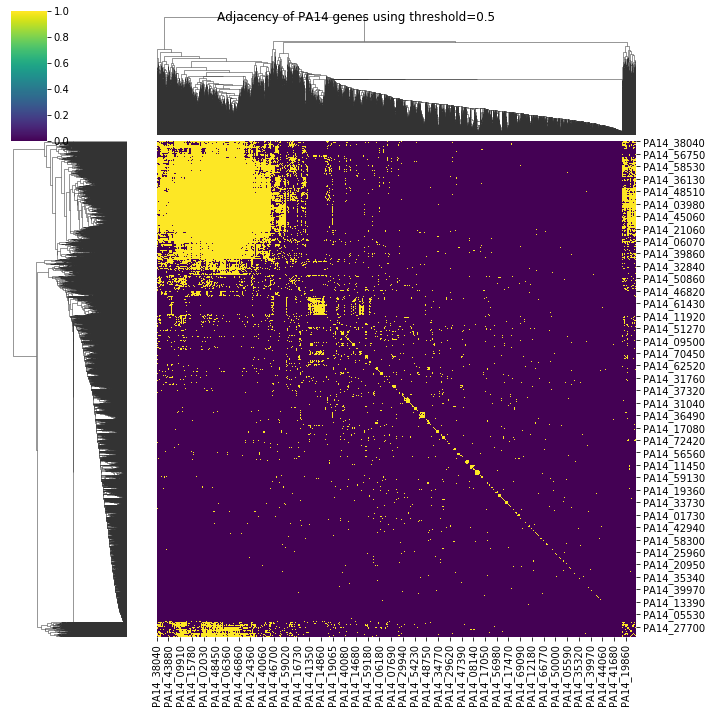

In [12]:
# Plot heatmap
plt.figure(figsize=(20, 20))
h2 = sns.clustermap(pa14_adj, cmap="viridis")
h2.fig.suptitle(f"Adjacency of PA14 genes using threshold={corr_threshold}")

# Save
pa14_clustermap_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pa14_adj_{corr_threshold}_clustermap.png"
)
h2.savefig(pa14_clustermap_filename, dpi=300)

## Module detection
To detect modules, we want to look for genes that are closely related based on the adjacency matrix (i.e. genes that have similar connections)

First we need to calculate the topological overlap measure (TOM) using [TOMsimilarity](https://rdrr.io/cran/WGCNA/man/TOMsimilarity.html). The topological overlap of two nodes reflects their similarity in terms of the commonality of the nodes they connect to.

* input: adjacency matrix (square symmetric matrix with 0 and 1 entries)
* output: matrix holding the topological overlap. For an unweighted network, topological overlap = 1 if node _i_ and _j_ are linked and the neighbors of the node _i_ is connected to all of the neighbors of node _j_. Topological overlap = 0 if node _i_ and _j_ are unlinked and the two nodes have no common neighbors. The TOM is a matrix of continuous values ranging from 0 to 1.

Next, we need to cluster based on this information. For now, we will use heirarchal clustering, [hclust](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/hclust) to identify communities. A community is a group of genes with shared connections. This function performs a hierarchical cluster analysis using a set of dissimilarities for the n objects being clustered. Initially, each object is assigned to its own cluster and then the algorithm proceeds iteratively, at each stage joining the two most similar clusters, continuing until there is just a single cluster. At each stage distances between clusters are recomputed by the Lance–Williams dissimilarity update formula according to the particular clustering method being used.


* input: distance of the dissimilarity matrix (i.e. distance of 1- TOM). The dissimilarity matrix is a matrix that is max = 1 if two genes are very dissimilar based on their connections. This matrix contains continuous values. Taking the distance of the dissimilarity will compare the genes based on their dissimilarity scores and return a distance between them. This distance matrix is a continuous value. This matrix is a lower triangle matrix.
* output: hclust object which describes the [tree](https://en.wikipedia.org/wiki/Dendrogram) produced by the clustering process.

Finally we need to use [cutreeDynamic](https://rdrr.io/cran/dynamicTreeCut/man/cutreeDynamic.html) to identify modules based on hclust output (tree). Cutting the tree at a given height will give a partitioning clustering at a selected precision.

* input: hierarchial clusterig dendogram returned from hclust
* output: A vector of numerical labels giving assignment of objects to modules. Unassigned objects are labeled 0, the largest module has label 1, next largest 2 etc.

In [13]:
%%R
library("WGCNA")

R[write to console]: Loading required package: dynamicTreeCut

R[write to console]: Loading required package: fastcluster

R[write to console]: 
Attaching package: ‘fastcluster’


R[write to console]: The following object is masked from ‘package:stats’:

    hclust


R[write to console]: 

R[write to console]: 
Attaching package: ‘WGCNA’


R[write to console]: The following object is masked from ‘package:stats’:

    cor




In [14]:
%%R -i pao1_adj -i clustering_method -i deep_split -i min_cluster_size -o pao1_modules -o TOM_pao1

pao1_adj_mat <- as.matrix(pao1_adj)
print(is.numeric(pao1_adj_mat))

# Similarity based on adjacency
TOM_pao1 <- TOMsimilarity(pao1_adj_mat)
dissTOM <- 1-TOM_pao1

# Clustering
geneTree <- hclust(as.dist(dissTOM), method=clustering_method)

# Module identification using dynamic tree cut:
pao1_modules <- cutreeDynamic(
    dendro = geneTree,
    distM = dissTOM,
    deepSplit = deep_split,
    minClusterSize = min_cluster_size
)


table(pao1_modules)

[1] TRUE
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.
 ..cutHeight not given, setting it to 0.99  ===>  99% of the (truncated) height range in dendro.
 ..done.
 [1]  120 2932  278  257  238  113  109   86   84   82   81   79   78   76   71
[16]   67   64   64   63   62   61   58   56   52   51   46   44   42   42   39
[31]   38   30


In [15]:
%%R -i pa14_adj -i clustering_method -i deep_split -i min_cluster_size -o pa14_modules -o TOM_pa14

pa14_adj_mat <- as.matrix(pa14_adj)
print(is.numeric(pa14_adj_mat))

# Similarity based on adjacency
TOM_pa14 <- TOMsimilarity(pa14_adj_mat)
dissTOM <- 1-TOM_pa14

print("TOM")
print(TOM_pa14)

# Clustering
geneTree <- hclust(as.dist(dissTOM), method=clustering_method)

# Module identification using dynamic tree cut:
pa14_modules <- cutreeDynamic(
    dendro = geneTree,
    distM = dissTOM,
    deepSplit = deep_split,
    minClusterSize = min_cluster_size
)


table(pa14_modules)

[1] TRUE
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.
[1] "TOM"
               [,1]        [,2]        [,3]       [,4]        [,5]       [,6]
   [1,] 1.000000000 0.949904883 0.940711462 0.07042254 0.288288288 0.33333333
   [2,] 0.949904883 1.000000000 0.961791831 0.07042254 0.342342342 0.31818182
   [3,] 0.940711462 0.961791831 1.000000000 0.01408451 0.072072072 0.09090909
   [4,] 0.070422535 0.070422535 0.014084507 1.00000000 0.500000000 0.00000000
   [5,] 0.288288288 0.342342342 0.072072072 0.50000000 1.000000000 0.00000000
   [6,] 0.333333333 0.318181818 0.090909091 0.00000000 0.000000000 1.00000000
   [7,] 0.950239234 0.939712919 0.722368421 0.05633803 0.180180180 0.84615385
   [8,] 0.190476190 0.190476190 0.000000000 0.00000000 0.000000000 0.14285714
   [9,] 0.879367172 0.918259723 0.890789474 0.12676056 0.477477477 0.40909091
  [10,] 0.899419729 0.912959381 0.881422925 0.08450704 0.297297297 0.58461538
  [11,] 0.948066298 0.946961326 0.663157

## Plot TOM

<Figure size 1440x1440 with 0 Axes>

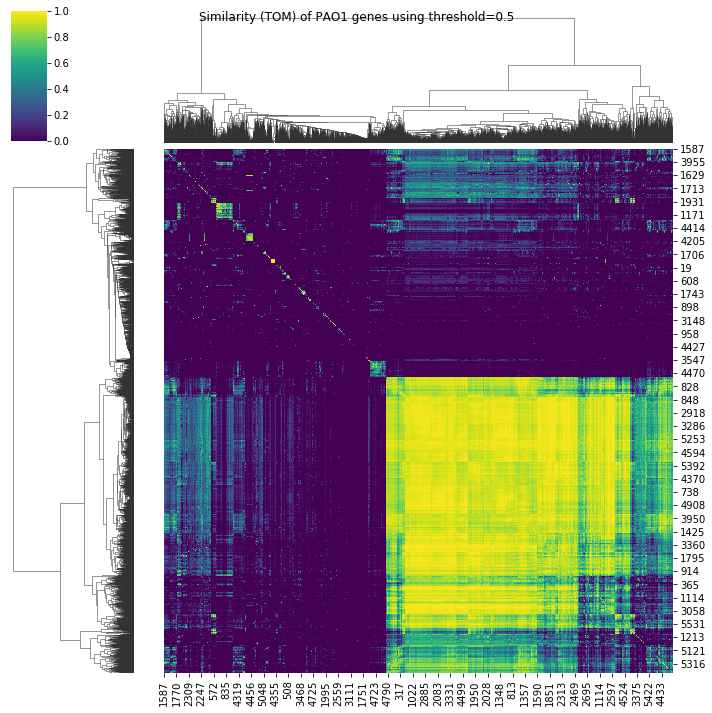

In [16]:
# Plot heatmap
plt.figure(figsize=(20, 20))
h3 = sns.clustermap(TOM_pao1, cmap="viridis")
h3.fig.suptitle(f"Similarity (TOM) of PAO1 genes using threshold={corr_threshold}")

# Save
pao1_clustermap_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pao1_TOM_{corr_threshold}_clustermap.png"
)
h3.savefig(pao1_clustermap_filename, dpi=300)

<Figure size 1440x1440 with 0 Axes>

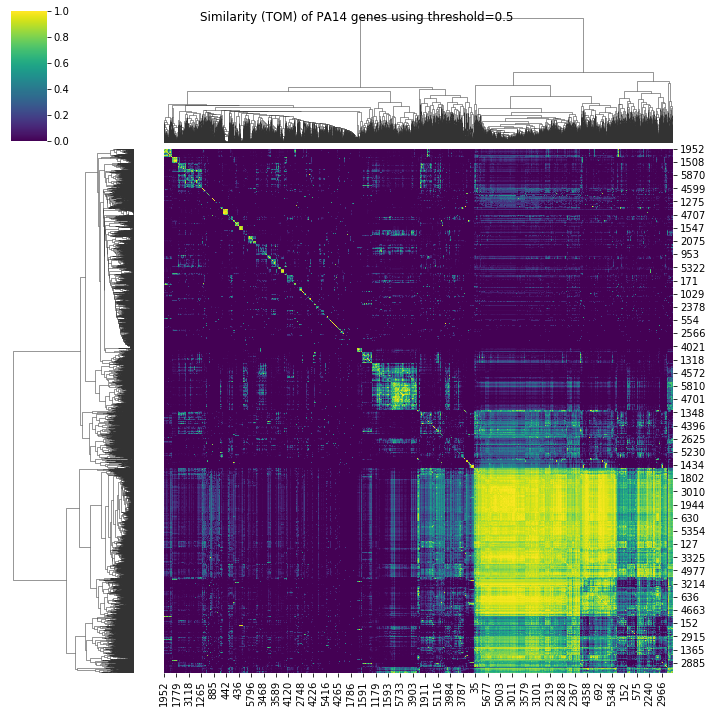

In [17]:
# Plot heatmap
plt.figure(figsize=(20, 20))
h4 = sns.clustermap(TOM_pa14, cmap="viridis")
h4.fig.suptitle(f"Similarity (TOM) of PA14 genes using threshold={corr_threshold}")

# Save
pa14_clustermap_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pa14_TOM_{corr_threshold}_clustermap.png"
)
h4.savefig(pa14_clustermap_filename, dpi=300)

## Get membership

In [18]:
# Get module membership for a single threshold
# Format and save output to have columns: gene_id | group_id
pao1_membership_df = pd.DataFrame(
    data={"module id": pao1_modules}, index=pao1_adj.index
)

pao1_membership_df["module id"].value_counts()

1.0     2932
2.0      278
3.0      257
4.0      238
0.0      120
5.0      113
6.0      109
7.0       86
8.0       84
9.0       82
10.0      81
11.0      79
12.0      78
13.0      76
14.0      71
15.0      67
16.0      64
17.0      64
18.0      63
19.0      62
20.0      61
21.0      58
22.0      56
23.0      52
24.0      51
25.0      46
26.0      44
28.0      42
27.0      42
29.0      39
30.0      38
31.0      30
Name: module id, dtype: int64

In [19]:
# Get module membership for a single threshold
# Format and save output to have columns: gene_id | group_id
pa14_membership_df = pd.DataFrame(
    data={"module id": pa14_modules}, index=pa14_adj.index
)

pa14_membership_df["module id"].value_counts()

1.0     2066
2.0      178
3.0      139
4.0      129
5.0      128
6.0      108
7.0       97
8.0       85
9.0       81
10.0      80
11.0      79
12.0      77
13.0      76
14.0      72
16.0      71
15.0      71
18.0      69
17.0      69
20.0      66
19.0      66
22.0      64
23.0      64
21.0      64
24.0      63
25.0      62
26.0      61
28.0      61
27.0      61
29.0      61
30.0      59
        ... 
33.0      57
35.0      55
36.0      54
38.0      53
37.0      53
39.0      51
40.0      50
41.0      48
43.0      48
42.0      48
46.0      47
0.0       47
44.0      47
45.0      47
48.0      46
47.0      46
50.0      43
49.0      43
51.0      40
52.0      39
53.0      38
55.0      35
54.0      35
56.0      34
57.0      33
58.0      32
60.0      31
59.0      31
62.0      30
61.0      30
Name: module id, Length: 63, dtype: int64

In [20]:
# Save membership dataframe
# pao1_membership_df.to_csv(pao1_membership_filename, sep="\t")
# pa14_membership_df.to_csv(pa14_membership_filename, sep="\t")